# CS 180 MP2: Handwritten Signatures - Forged or Real?
### Dionio, Mikhael
### Leal, Lois Anne

## Objective

According to $^{[1]}$Findlaw(n.d), signature forgery is one of the types of forgeries by which one can be
charged with the crime of fraud and/or identity theft. Signature forgery specifically refers to the
falsification or imitation of signatures by which there is an intent to deceive the other person.
This crime is serious especially when it comes to bank identification, licences, diplomas,
contracts, and legal certificates.

There are different types of forgery. According to $^{[2]}$Lyle(2016), still 
"Even the most careful and gifted forgers leave behind evidence of their efforts. Examiners inspect documents not only with the naked eye but also view them under a microscope, which often reveals telltale signs of forgery."

This challenge is a great application of Artificial Intelligence, as we know that AI can learn fast than a normal perso to discriminate which signatures are forged or real in the basis of computer vision which deals to the tiniest of pixels and a number of real and forged signatures.  

Thus, the aim of the machine problem is to help use Neural Networks to classify signatures whether it’s a genuine signature or a forged signature.

# Methodology

## Dataset
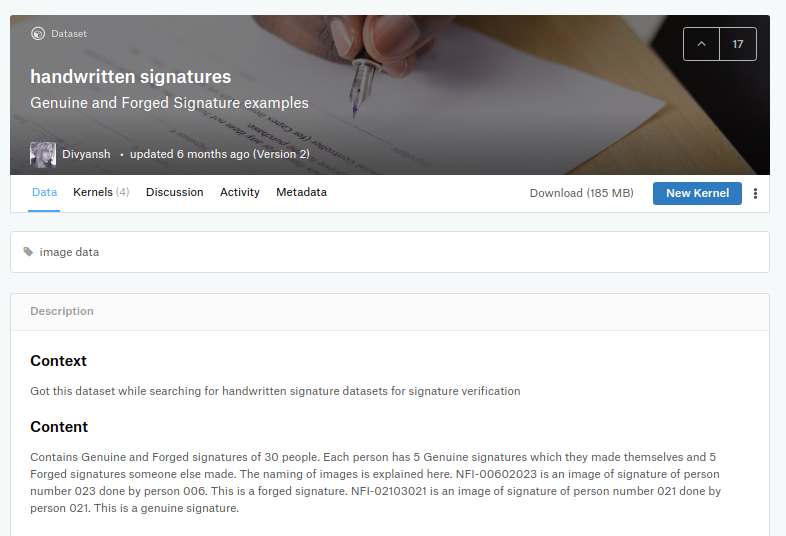

First of all, we need a dataset containing pictures of real and its corresponding forged signatures. 
This dataset has images of five genuine signatures and five forged signatures of thirty different
people. Each image is identified by its filename which indicates who owns the signature and
who did the signature.

Link to the dataset: https://www.kaggle.com/divyanshrai/handwritten-signatures

## Image Preprocessing

We look in a high level in our dataset. We can see below the folder structure by which the raw dataset was structured.

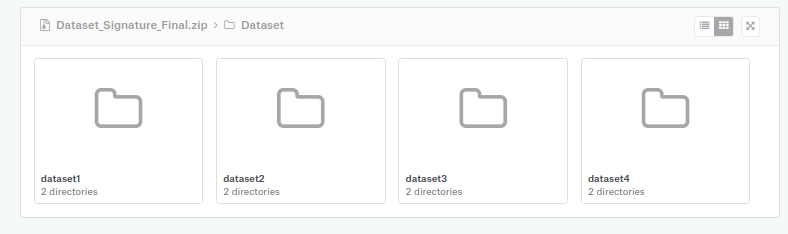
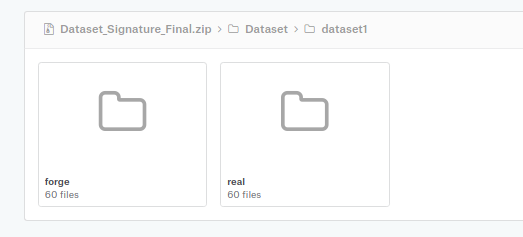

This may seem workable, but we can reduce to a more workable structure such that instead of having 4 different datasets, we compress them into one. Also, instead of having two separate folders for forge and real, we replace the classification by putting prefixes: "0_" if forged and "1_" if real.

Now we look into the data. 

## Loading and Resizing Images

In the code below, we have two functions: def loadImages(folder) and def image_resize(data). We first load the images, putting them into the list and having them as input to the image_resize data for resizing. We resize the images, mainly to establish a base size since in their raw form, they vary in sizes. 

In [1]:
# below is the compilation of all needed imports for this Machine Problem
from __future__ import absolute_import, division, print_function

#system and python libraries
import os, sys
from time import time
from time import sleep

#data-related libraries
import numpy as np
import pandas as pd
import cv2

#image-related libaries
from IPython.display import display
from IPython.display import Image as _Imgdis
from PIL import Image

#matplotlib
from matplotlib import pyplot as plt

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

Working with 542 signature images
Image examples: 
1_00105001.png


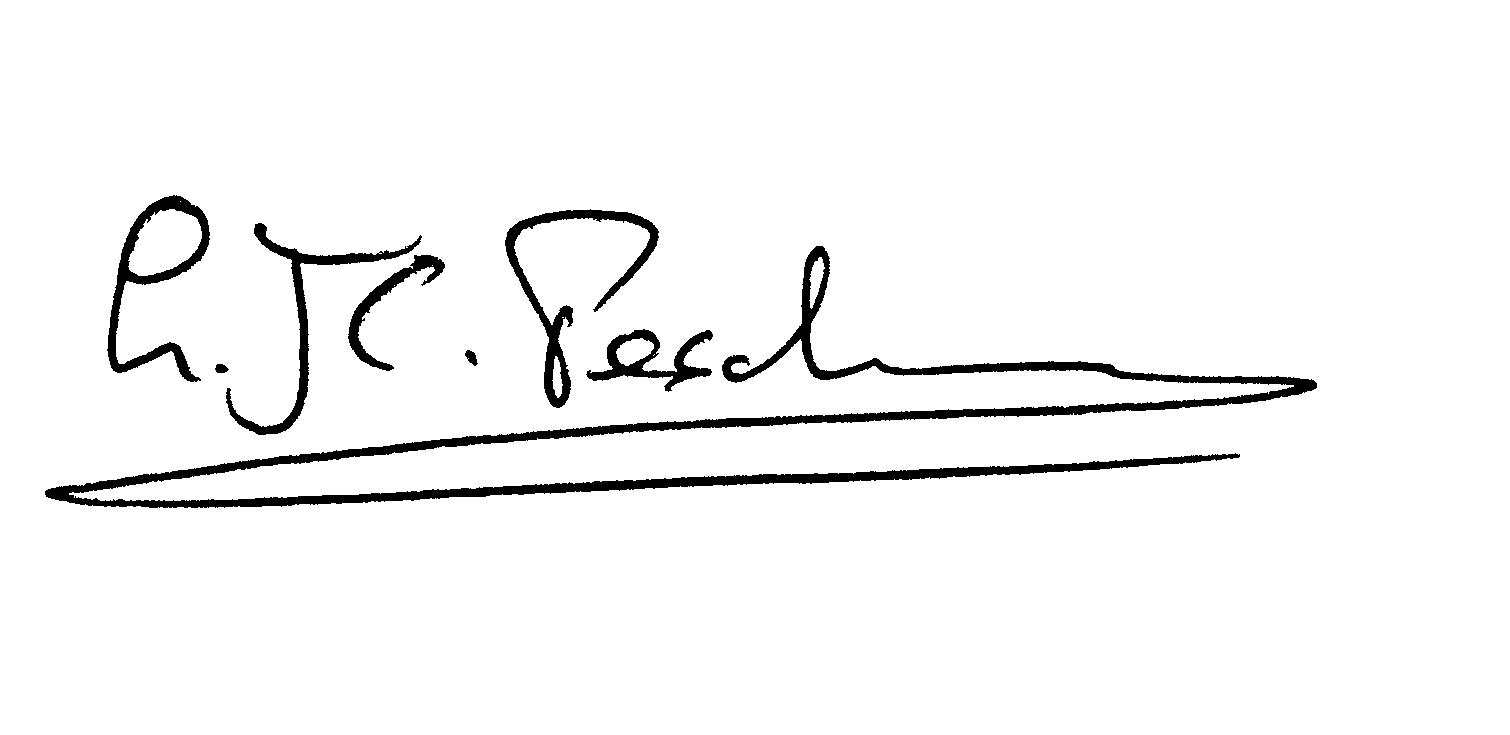

0_02202001.png


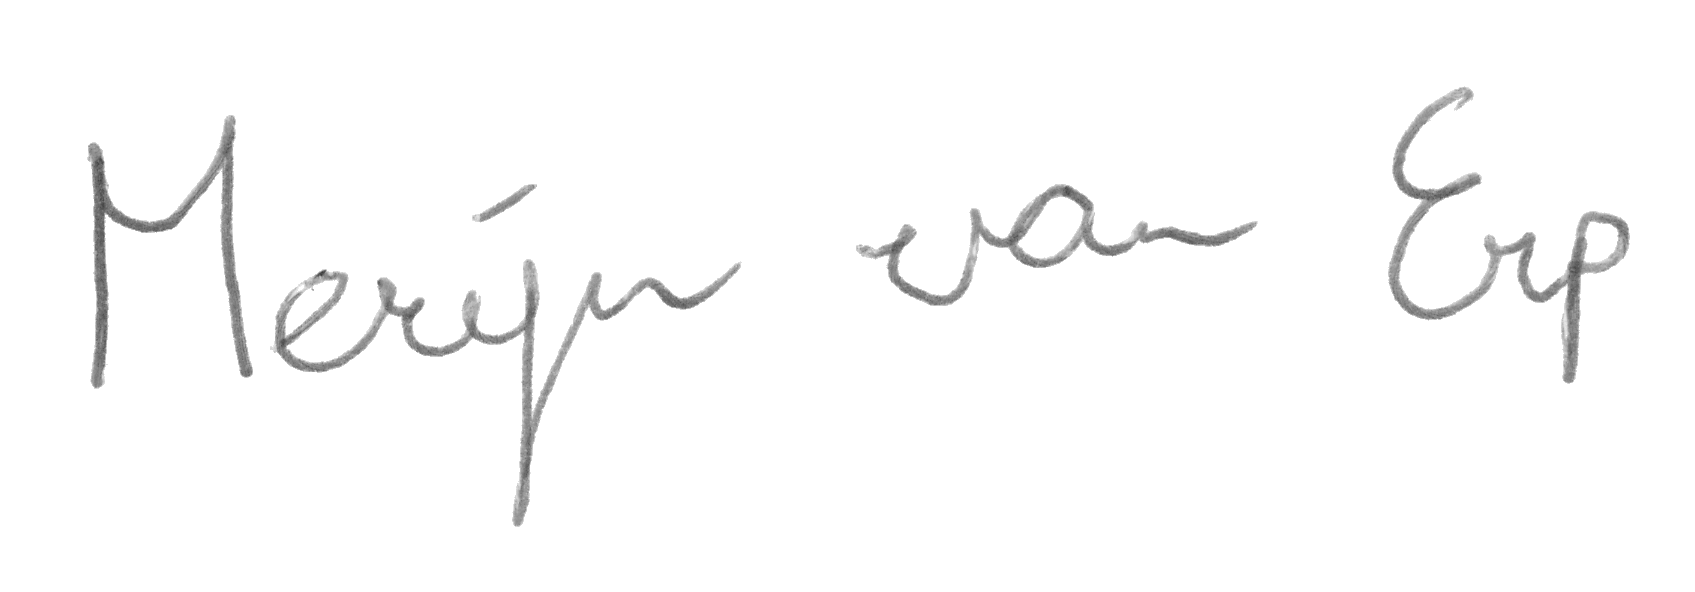

0_06105071.png


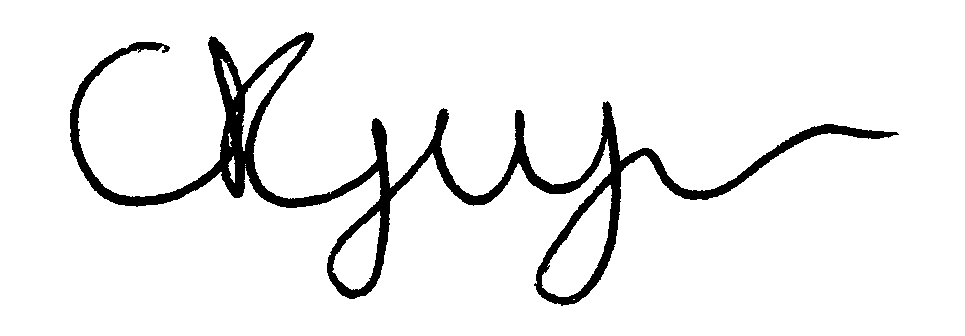

1_00304003.png


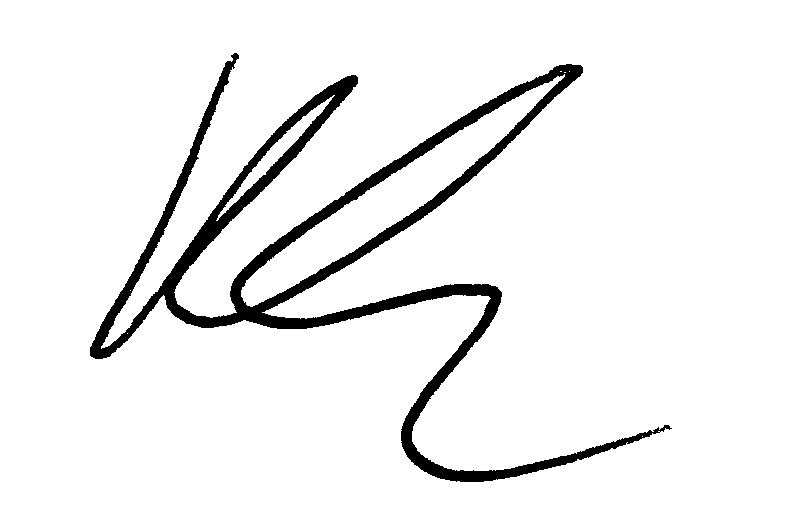

0_02205002.png


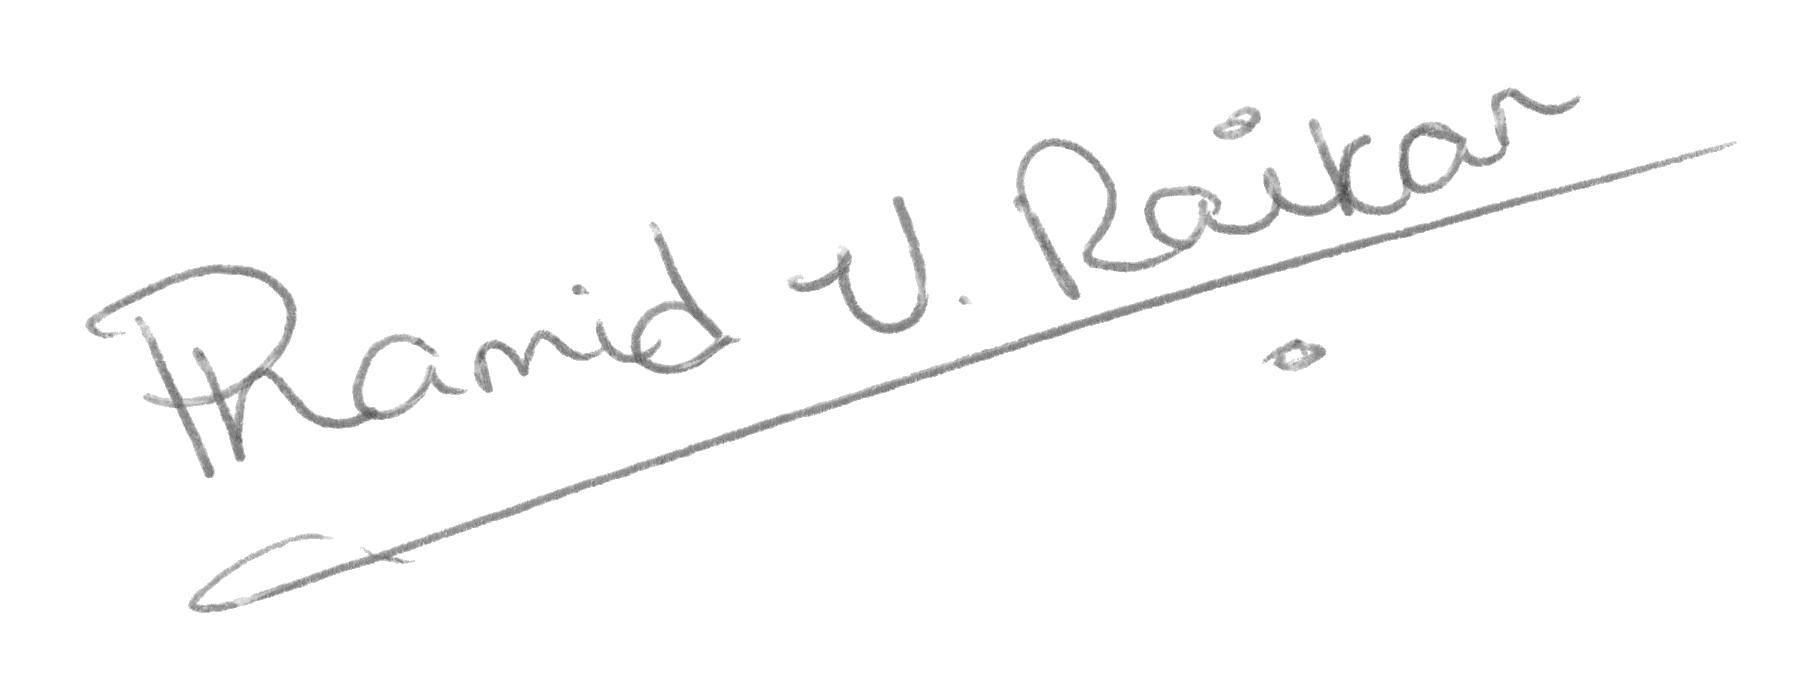

In [2]:
# load from folder
imgs_raw = "dataset_mixed"


# get filenames
files_raw = [f for f in os.listdir(imgs_raw) if os.path.isfile(os.path.join(imgs_raw, f))]


print("Working with {0} signature images".format(len(files_raw)))
print("Image examples: ")

# we look at some raw images
for i in range(0, 5):
    print(files_raw[i])
    display(_Imgdis(filename=imgs_raw + "/" + files_raw[i], width=240, height=320))



In [3]:
def loadImages(folder):
    # put files into lists and return them as one list
    image_files = sorted([os.path.join(folder, file) for file in os.listdir(folder)])
    return image_files

In [4]:
def image_resize(data):
    # getting all images to work with
    # and converting them to grayscale
    img = [cv2.imread(i, cv2.IMREAD_GRAYSCALE) for i in data]
    print('Original size',img[0].shape)
   
    # setting dim of the resize
    height = 160
    width = 320
    dim = (width, height)
    res_img = []
    for i in range(len(img)):
        res = cv2.resize(img[i], dim, interpolation=cv2.INTER_LINEAR)
        res_img.append(res)

    # Checking the size
    print("RESIZED", res_img[1].shape)
    
    
    return res_img

Original size (58, 171)
RESIZED (160, 320)
Signature Images Resized
1_00105001.png


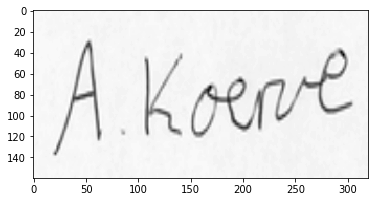

0_02202001.png


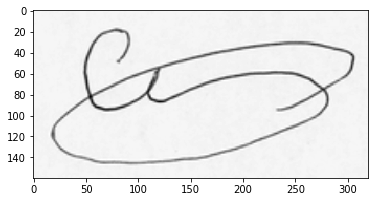

0_06105071.png


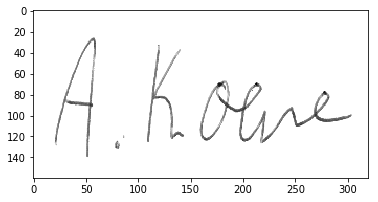

In [5]:
%matplotlib inline

#resize images to standard size for easier processing
images = loadImages(imgs_raw)

images_resized= image_resize(images)

#show image examples
print("Signature Images Resized")
for i in range(0, 3):
    print(files_raw[i])
    plt.imshow(images_resized[i], cmap ='gray')
    plt.show()
    

### Splitting the Training Data and the Test Data

In [6]:
from scipy import ndimage
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

labels = [] # list of the labels-- 0, 1 corresponding to the photo 
i=0
for _file in files_raw: 
    label_in_file = _file.find("_")
    labels.append(int(_file[0:label_in_file]))
print("Total Images: %d" % len(labels))


Using TensorFlow backend.


Total Images: 542


In [7]:
from sklearn.model_selection import train_test_split

#Splitting 
train_images, test_images, train_labels, test_labels = train_test_split(images_resized, labels, test_size=0.3, random_state=33)
train_images = np.array(train_images) # converting to numpy 
train_images.shape 
test_images = np.array(test_images) # converting to numpy 
test_images.shape

(163, 160, 320)

In [8]:
# "We scale these values to a range of 0 to 1 before feeding to the neural network model. 
# For this, we divide the values by 255. It's important that the training set and the 
# testing set are preprocessed in the same way:"  
# Train your first neural network: Basic classification TensorFlow(n.d.)

train_images = train_images / 255.0
test_images = test_images / 255.0

In [9]:
# two classes by which we classify
class_names = [ "forged", "real"] 

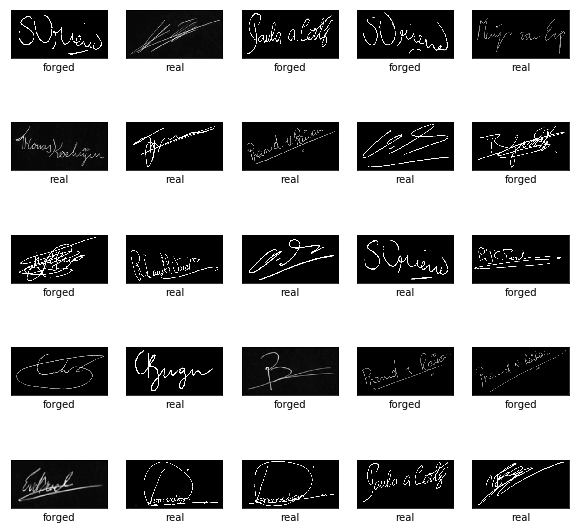

In [10]:
# show images with classes
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Training the Neural Network

As shown in the code below, the model has three layers
The 'flatten' layer simply formats the image data from a 2-D array to a 1-D array
The next two are 'dense' layers which are "densely-connected, or fully-connected, neural layers"
 


In [11]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(160,320)),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

Instructions for updating:
Colocations handled automatically by placer.


The model.compile() method configures the model for traininng.
We set our model's optimizer, loss function, and metric.
The optimizer is "how the model is updated based on what it sees and the loss function"
The loss function "measures how accurate the model is during training"
The metric (in this case accuracy) is what the model uses to measure its performance. 

In [12]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

As we run the model.fit below, this shows us the training accuracy of 56.46%.

In [13]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
379/379 [==============================] - 3s 9ms/sample - loss: 6.6857 - acc: 0.5172
Epoch 2/5
379/379 [==============================] - 2s 5ms/sample - loss: 7.0171 - acc: 0.5646
Epoch 3/5
379/379 [==============================] - 2s 5ms/sample - loss: 7.0171 - acc: 0.5646
Epoch 4/5
379/379 [==============================] - 2s 6ms/sample - loss: 7.0171 - acc: 0.5646
Epoch 5/5
379/379 [==============================] - 2s 5ms/sample - loss: 7.0171 - acc: 0.5646


## Evaluating Accuracy (Test Accuracy)

In [14]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

163/163 [==============================] - 0s 1ms/sample - loss: 6.6252 - acc: 0.5890
Test accuracy: 0.5889571


## Making Predictions using the Model

In the next three cells, we do batch prediction that is we feed those test images to the model and predict. 

In [15]:
predictions = model.predict(test_images)
predictions[0]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [16]:
#the prediction for the first test image is a forged
np.argmax(predictions[0]) 

0

In [17]:
# checking it directly with the test image labels
test_labels[0] 

0

In [18]:
#show image, along with prediction, prediction percentage, and actual value
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

#show a bar graph of prediction percentages among different classes
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

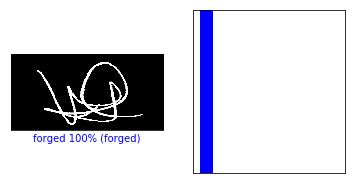

In [19]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

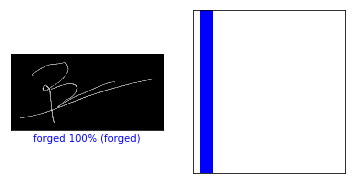

In [20]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

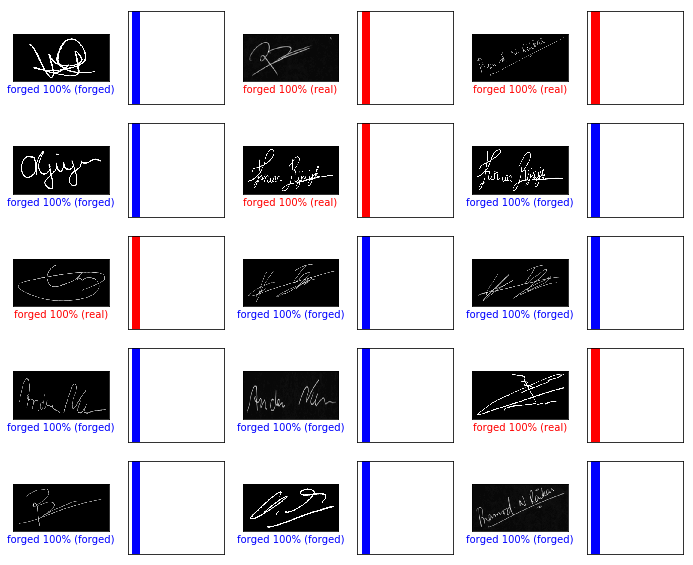

In [21]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

## Data and Analysis of Results

### Current Results
###### Training Accuracy: 56.46%
##### Test Accuracy: ~58.9%

Since our training accuracy is lower than our test accuracy, we have somewhat a confidence that overfitting does not happen. As we may recall, overfitting happens when the training accuracy is greater than the test accuracy. 

### Can we further increase the accuracy?
There are certain factors that we may investigate that may contribute to the accuracy. As Gandhi(2018) explicitly advised "Each neural network will have its best set of hyperparameters which will lead to maximum accuracy. You might ask, “there are so many hyperparameters, how do I choose what to use for each?”, Unfortunately, there is no direct method to identify the best set of hyperparameter for each neural network so it is mostly obtained through trial and error."
We try to do trial and error. 

#### 1. Photo Size
##### a. Decrease Photo size
The following parameters are changed:
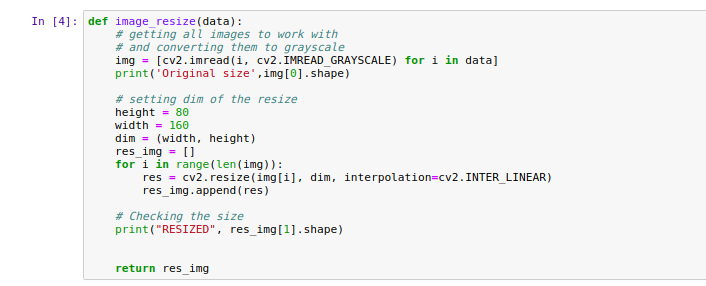
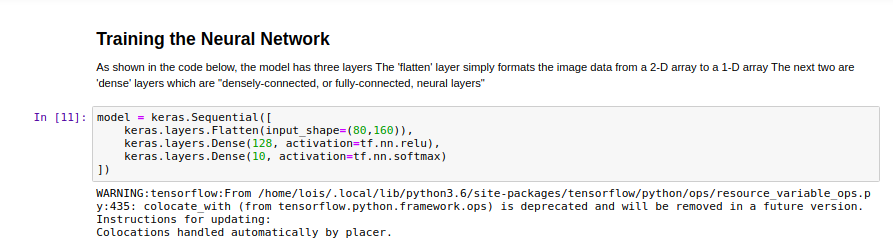
The photosize was halved. However, the results are the same as seen below.
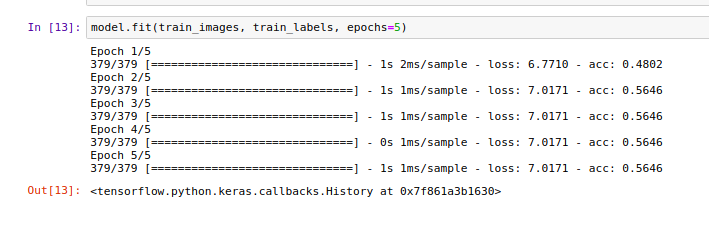
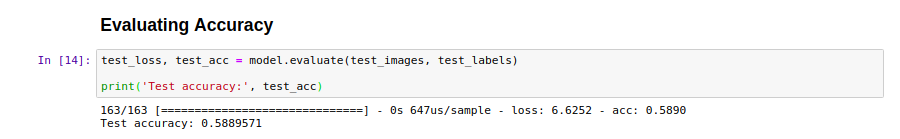

##### b. Increase Photo size
Increasing the photosize also does not increase the accuracy. 
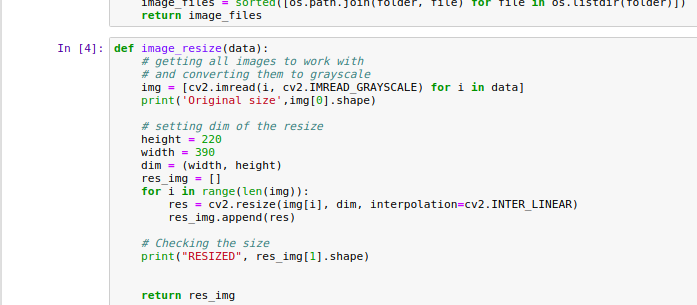
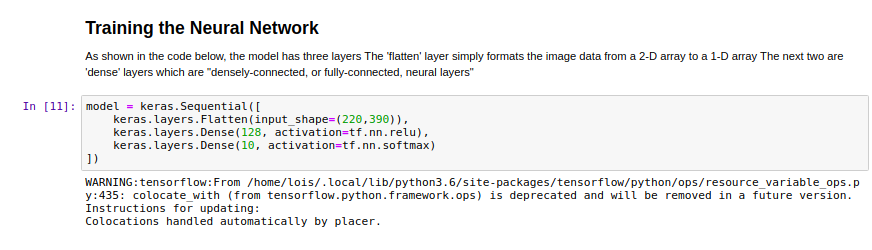
As we can see in the training and testing accuracy:
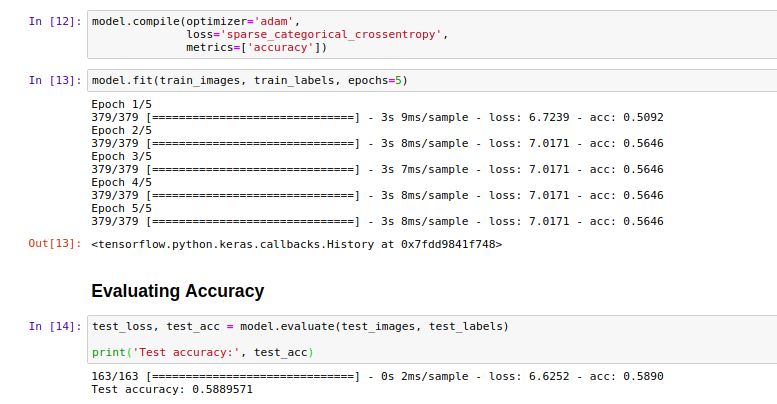

#### 2. The ratio of training data and testing data split
##### a. Decreasing Test Data, Increasing Training Data
Decreasing the Test Data to 25% gains a decrease also in accuracy. 
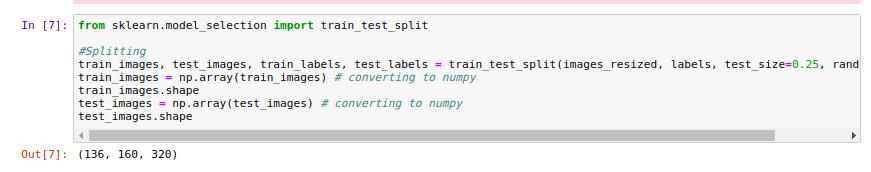
As we can see below:
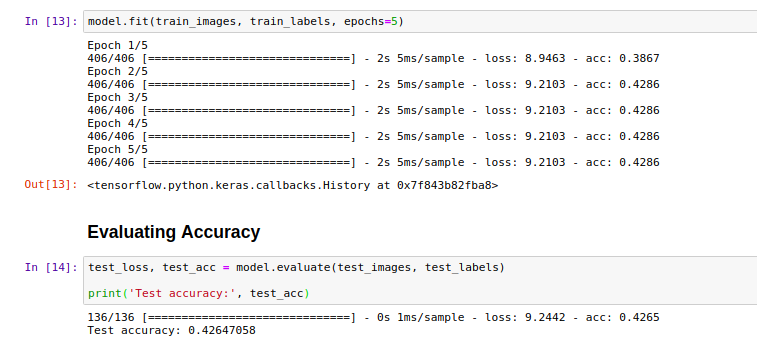
Further decreasing the Test Data continues to decrease the training accuracy.

##### b. Increase Test Data, Decrease Training Data
Increasing the Test Data to 35% gains also a decrease in accuracy
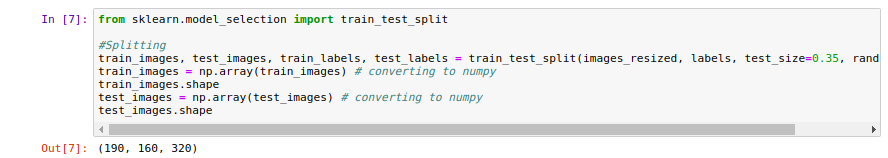
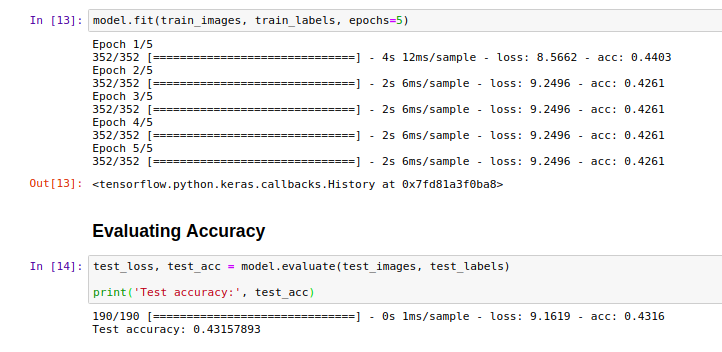

#### 3. Dense Parameters of Sequential Function
At first, without knowing what this means, we can see that we can actually change these parameters.
However according to Shulga(2017), "using different activations function doesn’t affect what our network can learn, only how fast (how many data/epochs it needs). Here’s a plot of all of the activation function we tried but this time for a much longer training period. You can see that all the activation functions are achieve~98% accuracy eventually."

As tried with relu, tanh, sigmoid as seen below, it really is the case that alll activation function achieve ~58.9% accuracy eventually.
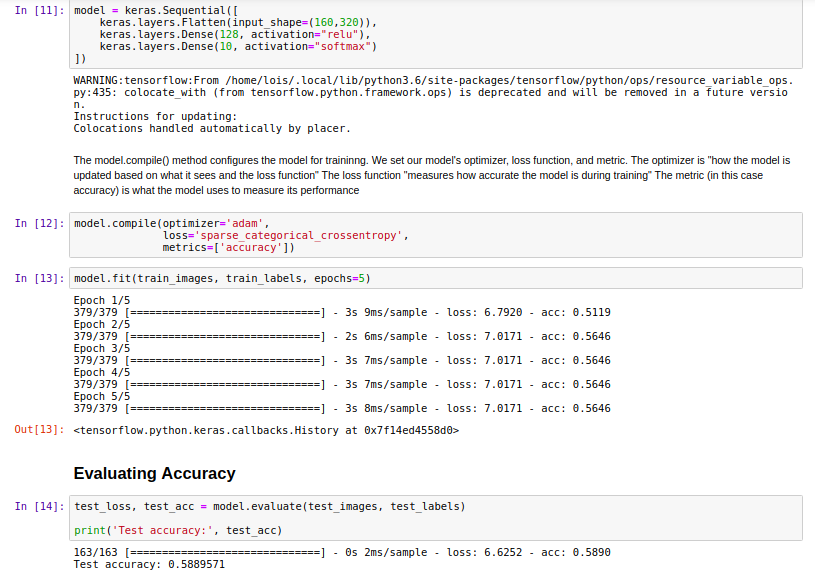
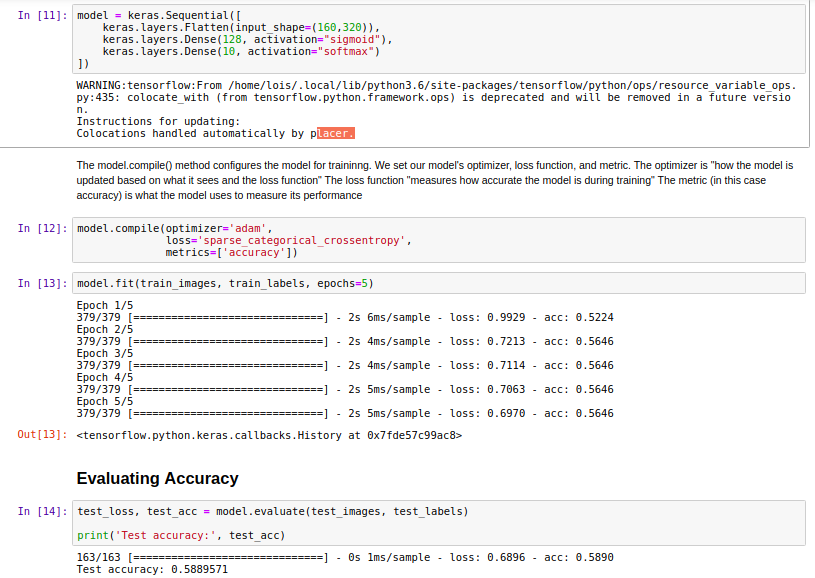
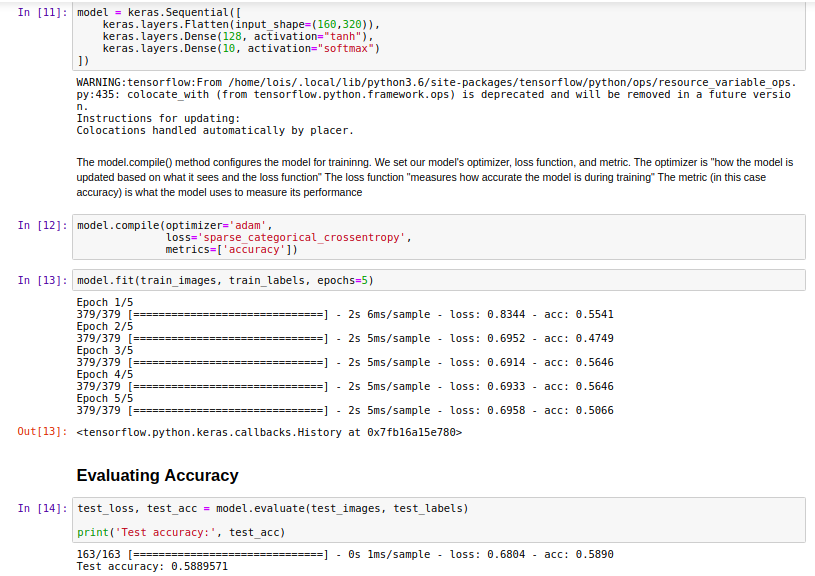

#### 4. Optimizer, Loss and Metrics Parameters of the Compile Function
We focus on the Loss function here. Doing trial and error on the given available losses (not considering that we can actually build one) in https://keras.io/losses/, we found out that indeed as Ghandi(2018) have noted that the sparse_categorical_crossentropy is one of the best practices to use as a loss function for classification problems. 

Trying the ff:
- mean_squared_error
- mean_absolute_error
- mean_absolute_percentage_error
- mean_squared_logarithmic_error
- squared_hinge
- hinge
- categorical_hinge
- logcosh

results into a ~0% training and test accuracy. It would be great for future discussions to explore the reasons given the result for each of the loss function. 

Trying out another set spews out errors:
- categorical_crossentropy
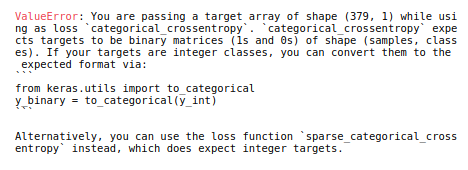
- binary_crossentropy
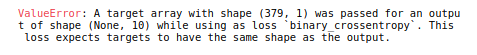

The last set listed below also gave out ~0% training and test accuracy.
- kullback_leibler_divergence
- poisson
- cosine_proximity

#### 5. Number of Epochs

As we can see above, we've already seen from the examples that lowering the number of epochs does not increase accuracy. 
So how about increasing the number of epochs?
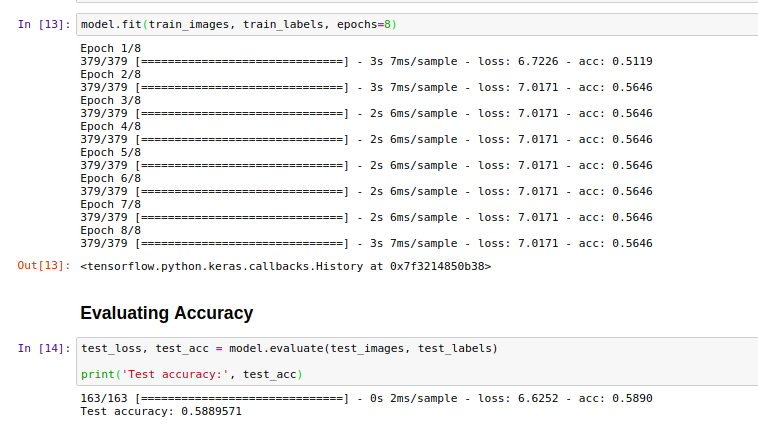
As we see here, the increase in training accuracy started to plateau at the second epoch and there's also no change in testing accuracy


## Conclusion

As we've said before, this is a great challenge to Artificial Intelligence since there are two main factors of difficulty: the intent of the forger is to really copy the genuine signature and the variations on the genuine signature themselves. Given this qualititative analysis, it's very reasonable to expect a low accuracy. Quantitatively, this can be further explained by our results in the Analysis part by which we try to experiment playing with the values of the possible factors contributing to our accuracy. 

For further studies, these things can be considered. First, perhaps classifying the data differently, such as according to who created the signature or determine 'real' or 'forged' signature of a single person would result in a higher accuracy. Second, approaching the analysis as a maximization problem which needs some techniques can also be applied since here we just naively played with the values. One maximization approach can be inspired by the Gradient Descent which is "Gradient Ascent" such that there's a comparison of values. However, getting the local and global maxima is also an issue. 

Digging further into this would not only challenge Artificial Intelligence but will be proved useful to real world applications as this deals with sensitive authorization of very important documents by which the consequences are high.

## Individual Contributions

Lois Anne Leal worked on:
Objective
Methodology
Data and Analysis of Results
Conclusion

Mikhael Dionio worked on:
Image Dataset Preprocessing,
Analysis of Results, 
Conclusion


### References

Canuma, P., & Canuma, P. (2018, October 10). Image Pre-processing. Retrieved from https://towardsdatascience.com/image-pre-processing-c1aec0be3edf?fbclid=IwAR2teR-lb63aDQefbey-FiKKC7ufD0AaIJucR9yt4EAYcaWg2GPdhGBEA9U


[1] Findlaw. (n.d.). Forgery. Retrieved from https://criminal.findlaw.com/criminal-charges/forgery.html

From image files to numpy arrays! (n.d.). Retrieved from https://www.kaggle.com/lgmoneda/from-image-files-to-numpy-arrays/notebook?fbclid=IwAR1oNVY1FiKeOiIov1uvoihcBOdcr_4kj96TNRfutL4hBb_0zmRxDtzhApo

Gandhi, R., & Gandhi, R. (2018, May 17). Improving the Performance of a Neural Network. Retrieved from https://towardsdatascience.com/how-to-increase-the-accuracy-of-a-neural-network-9f5d1c6f407d

[2] Lyle, D. P. (2016). Forensics For Dummies, 2nd Edition.

Shulga, D., & Shulga, D. (2017, June 25). Exploring Activation Functions for Neural Networks. Retrieved from https://towardsdatascience.com/exploring-activation-functions-for-neural-networks-73498da59b02

Train your first neural network: Basic classification TensorFlow. (n.d.). Retrieved from https://www.tensorflow.org/tutorials/keras/basic_classification?fbclid=IwAR0q7PAZMYtZHUbxi9Q9HtnqdklkUz4_tnFRHeYBervqMgtexvg7MhAb2So